# Assessing credit risk with machine learning methods

If you've ever applied for a mortgage, you know that financial firms process your information before making a decision. This is because giving you a mortgage can have a serious financial impact on their business. But how do they make a decision? In this assignment, you will have to prepare mortgage application data. After that, you will apply machine learning and business rules to reduce risk and ensure profitability. You will use a large set of mortgage data that emulates mortgage applications. You will be required to write the code in the boxes after each commented part. 

## Import and clean the data

As usual, the first step is to import and clean }the data. 

### Import the data

Ex 1: You have to first import the ***Data.csv*** file and consider the 'Id' column as the index of the dataframe. Hint: you need the ***pandas*** package to import the data. Once the data are uploaded, to have an idea of the data frame you are required to show the first 10 rows. 

In [3]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

# read the csv data using pd.read_csv function, define the first column as the index
df = pd.read_csv('Data.csv', index_col = 0)

print(df.shape)
print(df.columns)

(226067, 31)
Index(['loan_amnt', 'int_rate', 'installment', 'grade', 'emp_length',
       'home_ownership', 'annual_inc', 'loan_status', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'mths_since_last_delinq', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'collections_12_mths_ex_med', 'application_type',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim'],
      dtype='object')


Ex 2: The variable we want to predict is ***loan_status***. In particular, we want to predict the probability that a mortgage is *Charged Off* from the bank book. Before doing anything, we need to check for the presence of missing data. Notice that the variable ***loan_status*** is a categorical variable. 

In [4]:
# trying to check which column has what number of null values and storing it in "missing_values"
missing_values= df.isnull().sum()
print(missing_values)

loan_amnt                          0
int_rate                           0
installment                        0
grade                              0
emp_length                     14611
home_ownership                     0
annual_inc                         0
loan_status                        0
dti                              180
delinq_2yrs                        5
inq_last_6mths                     5
mths_since_last_delinq        115840
open_acc                           5
pub_rec                            5
revol_bal                          0
revol_util                       190
total_acc                          5
total_pymnt                        0
total_pymnt_inv                    0
total_rec_prncp                    0
total_rec_int                      0
total_rec_late_fee                 0
recoveries                         0
collection_recovery_fee            0
last_pymnt_amnt                    0
collections_12_mths_ex_med        16
application_type                   0
a

Ex 3: Do we have any missing value for the ***loan_status*** variable? If yes, we should fix it by replacing with the most common category. If not, we should keep it as it is. To avoid any confusion in workflow. Let's save a back-up copy of the dataframe so that we can reuse it if something goes wrong. 

In [5]:
df_backup = df.copy()

### Cleaning the data

Ex 4: There are some other variable in which we do have many *NaN* though. We should clean the data to make sure there will not be any issue when predicting the mortgages which have been charged off. Let us do the cleaning as follows:

- Step 1: Take out from the dataset those variables in which we have more than 10 missing observations. 
- Step 2: Drop only the missing observations for those variables in which we have less than 10 *NaN*. 

In [6]:
# Step 1:
# get the columns that have more than 10 missing values
columns_to_drop = missing_values[missing_values > 10].index
# drop the columns
df = df.drop(columns_to_drop, axis=1)

# Step 2:
df = df.dropna()
print (df)

        loan_amnt  int_rate  installment grade home_ownership  annual_inc  \
id                                                                          
1           18600     10.99       608.86     B           RENT     80000.0   
2            2000     17.97        72.28     D       MORTGAGE     55400.0   
3           12000     12.29       400.24     C            OWN     60000.0   
4           16000     19.42       589.90     D           RENT     64000.0   
5           22525     16.02       548.01     C       MORTGAGE     94080.0   
...           ...       ...          ...   ...            ...         ...   
226063       5000      7.21       154.87     A           RENT     46000.0   
226064      35000     21.85       963.68     D       MORTGAGE     70000.0   
226065       1200     18.99        43.99     D           RENT     90000.0   
226066      12000      8.90       381.04     A            OWN     35000.0   
226067      20000      8.24       628.95     B           RENT    200000.0   

Ex 5: Notice the variable of interest ***loan_status*** is a categorical variable, which means is a string. In order to run our classification algorithms we need to construct a quantitative (binary) variable which takes value 1 if the loan status is *charged off* and zero otherwise. Hint: we need the ***numpy*** package to do that. 

In [7]:
import numpy as np
# Creating dummy varibales in the "Loan Status" column
loan_dummy = pd.get_dummies(df['loan_status'])
df = pd.concat([df,loan_dummy], axis=1)
df['loan_status_dummy'] = df['loan_status'].apply(lambda x: 1 if x == 'Charged Off' else 0)
print(df['loan_status_dummy'].head(10))
print(df.columns)

id
1     0
2     0
3     0
4     0
5     0
6     1
7     0
8     0
9     0
10    0
Name: loan_status_dummy, dtype: int64
Index(['loan_amnt', 'int_rate', 'installment', 'grade', 'home_ownership',
       'annual_inc', 'loan_status', 'delinq_2yrs', 'inq_last_6mths',
       'open_acc', 'pub_rec', 'revol_bal', 'total_acc', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'application_type', 'acc_now_delinq', 'Charged Off',
       'Current', 'Default',
       'Does not meet the credit policy. Status:Charged Off',
       'Does not meet the credit policy. Status:Fully Paid', 'Fully Paid',
       'In Grace Period', 'Late (16-30 days)', 'Late (31-120 days)',
       'loan_status_dummy'],
      dtype='object')


### Data visualization 

Ex 6: Before moving to the model estimation and assessment part, we want to have a sense of the data we are dealing with. For instance, let us look at the distribution of the loan amount (**loan_amnt**) and the interest rate (**int_rate**) by borrowers credit score (**grade**). The credit score goes from A (high grade) to F (low grade). Hint: use the ***seaborn*** and the ***matplotlib*** packages. 

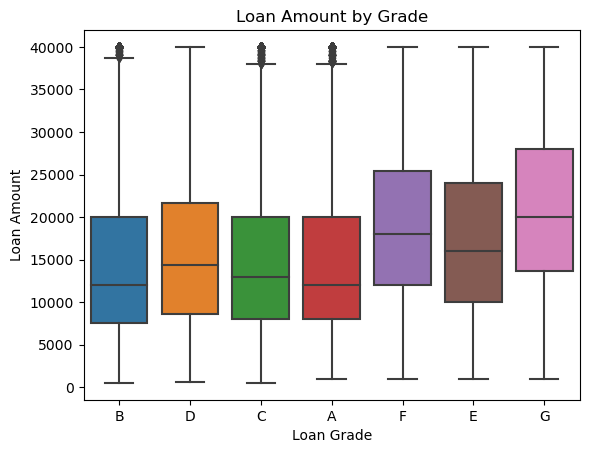

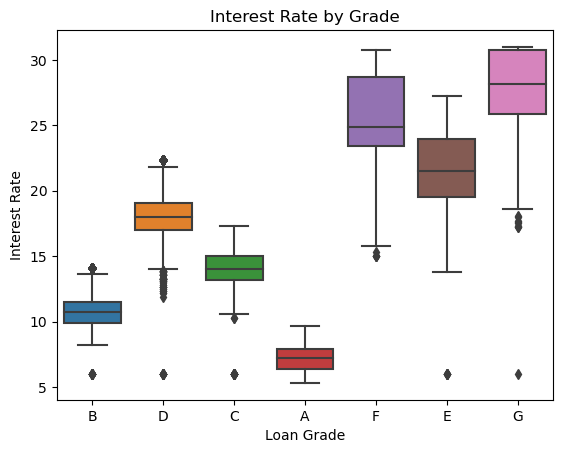

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# create a box plot to show the relationship between loan amount and loan grade
sns.boxplot(x='grade', y='loan_amnt', data=df)
plt.title('Loan Amount by Grade')
plt.xlabel('Loan Grade')
plt.ylabel('Loan Amount')
plt.show()

# create a box plot to show the relationship between installment and loan grade
sns.boxplot(x='grade', y='int_rate', data=df)
plt.title('Interest Rate by Grade')
plt.xlabel('Loan Grade')
plt.ylabel('Interest Rate')
plt.show()

 Do you see any specific patterns? Briefly discuss the results.  

### Sample splitting 

Ex 7: Before estimating the logistic regression and other models, we need to split the sample in *training* vs *testing* observations. Let us consider 70% of the total data as training sample and the remaining as testing period. Notice we are dealing with a binary target variable, so we need to balance out the splitting accordingly. 

Notice the variables we want to use for forecasting are:

- Loan amount (**loan_amnt**)
- Interest rate (**int_rate**)
- Annual income (**annual_inc**)
- Total mortgage payment (**total_pymnt**)
- Mortgage installment (**installment**)
- Total paied in interest rates (**total_rec_int**)
- Last payment amount (**last_pymnt_amnt**)

We can construct our matrix of predictors *X* by taking these variables from the data frame. Recall that the variable of interest here is the binary variable **loan_dummy**. 

In [10]:
from sklearn.model_selection import train_test_split

# Define the target variable
y = df['loan_status_dummy'].values

# Define the predictors
X = df[['loan_amnt','int_rate','annual_inc','total_pymnt','installment','total_rec_int','last_pymnt_amnt']]
# we are standardizing the data
from sklearn.preprocessing import StandardScaler

X_std = StandardScaler().fit_transform(X)

# the sample we are interested in makes 70% of the data

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Let assume we want to split the training sample in five validation periods. 

X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.3, random_state=42, stratify=y)

## Estimating a logistic regression 

Ex 8: We now estimate a logistic regression without shrinking the parameters. We estimate the regression using the *training* set of observations. 

In [11]:
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression(max_iter=1e5, fit_intercept = True).fit(X_train, y_train)
print(logit.coef_)

[[-0.02844868  0.52217847 -0.18184662 -0.51345266  0.55282584  0.11187651
  -7.01094619]]


Ex 9: We can now produce the forecast based on the observations in the testing sample. 

In [12]:
yhat  = logit.predict(X_test)

Ex 10a: Calculate the confusion matrix

In [13]:
# Confusion matrix

from sklearn import metrics
print(metrics.confusion_matrix(y_test, yhat))

[[59554   434]
 [ 7576   255]]


Can you give a comment on the confusion matrix? 

Ex 10b: Calculate now the forecast from a "no-skill" prediction, that is just taking the majority class. 

In [14]:
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]

# generate the predicted probabilities from the logistic regression
lr_probs = logit.predict_proba(X_test)[:,1]

Ex 10c: Now compare the logistic regression with the "no-skill" prediction based on the ROC curve. Hint: you need to use the **sklearn.metrics** and the **matplotlib.pyplot** packages. 

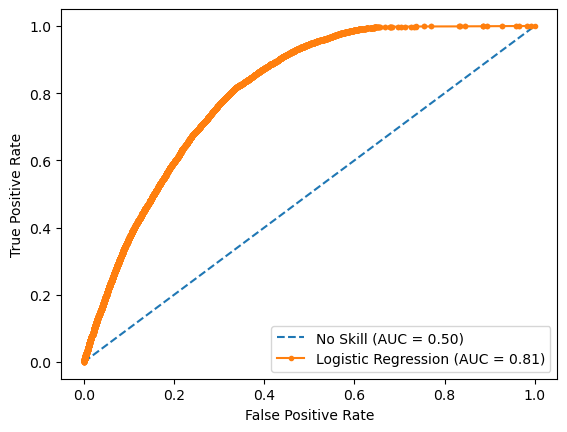

In [15]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
# Visualisation with plot_metric
# Calculate the false positive rate, true positive rate, and threshold
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)

# Calculate the area under the ROC curve (AUC)
lr_auc = roc_auc_score(y_test, lr_probs)
ns_auc = roc_auc_score(y_test, ns_probs)

# Plot the ROC curve
plt.plot(ns_fpr, ns_tpr, linestyle='--', label=f'No Skill (AUC = {ns_auc:.2f})')
plt.plot(lr_fpr, lr_tpr, marker='.', label=f'Logistic Regression (AUC = {lr_auc:.2f})')

# Set the axis labels and legend
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()

# Show the plot
plt.show()

Can you comment on the results?

## Estimating a classification tree

We now implement a classification tree to forecast mortgage defaults. We implement two different procedures. 

- 1. Classification tree with **max_depth** fixed
- 2. Classificarion tree with **max_depth** estimated by k-fold cross validation. 

Ex 11: Let start with a simple classification tree:

In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
# Procedure 1: Classification tree with max_depth fixed
dt_fixed = DecisionTreeClassifier(max_depth=3, ccp_alpha=0)
dt_fixed.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0, max_depth=3)

Ex 12: Now compare the classification tree against the logistic regression and the "no-skill" prediction estimated above based on the ROC curve.

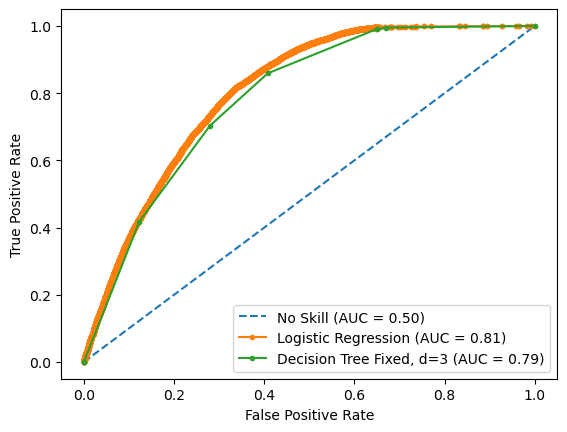

In [18]:
# generate the predicted probabilities from the logistic regression
dt_fixed_probs = dt_fixed.predict_proba(X_test)[:,1]

dt_fixed_fpr, dt_fixed_tpr, _ = roc_curve(y_test, dt_fixed_probs)

# Calculate the area under the ROC curve (AUC)
dt_fixed_auc = roc_auc_score(y_test, dt_fixed_probs)

# Plot the ROC curve
plt.plot(ns_fpr, ns_tpr, linestyle='--', label=f'No Skill (AUC = {ns_auc:.2f})')
plt.plot(lr_fpr, lr_tpr, marker='.', label=f'Logistic Regression (AUC = {lr_auc:.2f})')
plt.plot(dt_fixed_fpr, dt_fixed_tpr, marker='.', label=f'Decision Tree Fixed, d=3 (AUC = {dt_fixed_auc:.2f})')

# Set the axis labels and legend
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()

# Show the plot
plt.show()

Can you comment on the results? 

Ex 13: Let now re-calculate a classification tree but with the **max_depth** and the **min_samples_leaf** parameters estimated by a 5-fold cross-validation method. 

In [19]:
# generate the predicted probabilities from the logistic regression
dt = DecisionTreeClassifier(ccp_alpha=0)

params_dt = {'max_depth': [2,3,4,6],
             'min_samples_leaf': [1, 1.5, 2]}
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

# Instantiate grid_dt
dt = GridSearchCV(estimator=dt,param_grid=params_dt,scoring='accuracy',cv=5,verbose=1,n_jobs=-1)

dt.fit(X_train,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(ccp_alpha=0), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 6],
                         'min_samples_leaf': [1, 1.5, 2]},
             scoring='accuracy', verbose=1)

Ex 14: Now compare the classification tree with and without cross validation against the logistic regression and the "no-skill" prediction estimated above based on the ROC curve.

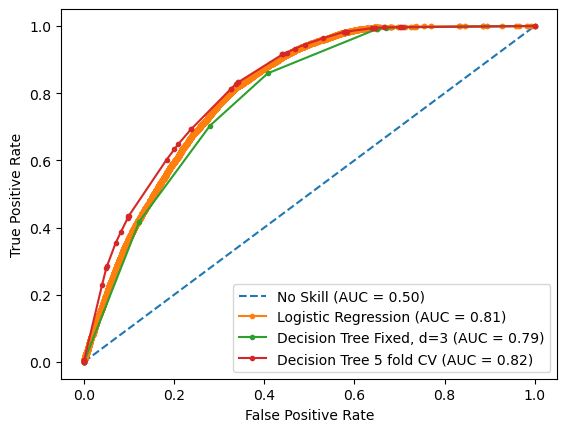

In [20]:
# generate the predicted probabilities from the logistic regression
dt_probs = dt.predict_proba(X_test)[:,1]

dt_fpr, dt_tpr, _ = roc_curve(y_test, dt_probs)

# Calculate the area under the ROC curve (AUC)
dt_auc = roc_auc_score(y_test, dt_probs)

# Plot the ROC curve
plt.plot(ns_fpr, ns_tpr, linestyle='--', label=f'No Skill (AUC = {ns_auc:.2f})')
plt.plot(lr_fpr, lr_tpr, marker='.', label=f'Logistic Regression (AUC = {lr_auc:.2f})')
plt.plot(dt_fixed_fpr, dt_fixed_tpr, marker='.', label=f'Decision Tree Fixed, d=3 (AUC = {dt_fixed_auc:.2f})')
plt.plot(dt_fpr, dt_tpr, marker='.', label=f'Decision Tree 5 fold CV (AUC = {dt_auc:.2f})')

# Set the axis labels and legend
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()

# Show the plot
plt.show()


Can you comment on the results?

## Estimating a random forest 

Ex 15: We now expand the set of models and include a random forest. The goal is to see if a more robust framework allows to have a more precise idea of the mortgage probability of default. Let us assume the number of estimators (**n_estimators**) equal to 10. 

In [23]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

# Number of features to consider at every split
max_features = ['sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [10, 20, 40]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap':bootstrap}

from sklearn.inspection import permutation_importance
from sklearn.ensemble import RandomForestClassifier
# First create the base model to tune
rf = RandomForestClassifier()

# Random search of parameters, using time splits, 
# search across 5 different combinations, and use all available cores
rf = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 2, cv = 5, verbose=2, random_state=42, n_jobs = -1)

# Fit the random search model
rf.fit(X_train,y_train)


Fitting 5 folds for each of 2 candidates, totalling 10 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=2,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['sqrt'],
                                        'min_samples_leaf': [10, 20, 40],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

Ex 16: Now compare the random forest against the classification tree, with and without cross validation, the logistic regression and the "no-skill" prediction estimated above based on the ROC curve.

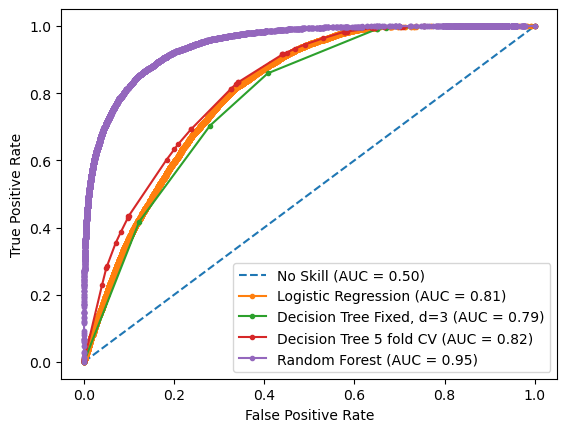

In [24]:
rf_probs = rf.predict_proba(X_test)[:,1]
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)


# Calculate the area under the ROC curve (AUC)
rf_auc = roc_auc_score(y_test, rf_probs)

# Plot the ROC curve
plt.plot(ns_fpr, ns_tpr, linestyle='--', label=f'No Skill (AUC = {ns_auc:.2f})')
plt.plot(lr_fpr, lr_tpr, marker='.', label=f'Logistic Regression (AUC = {lr_auc:.2f})')
plt.plot(dt_fixed_fpr, dt_fixed_tpr, marker='.', label=f'Decision Tree Fixed, d=3 (AUC = {dt_fixed_auc:.2f})')
plt.plot(dt_fpr, dt_tpr, marker='.', label=f'Decision Tree 5 fold CV (AUC = {dt_auc:.2f})')
plt.plot(rf_fpr, rf_tpr, marker='.', label=f'Random Forest (AUC = {rf_auc:.2f})')

# Set the axis labels and legend
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()

# Show the plot
plt.show()

Can you comment on the results?

Ex 17: Let us now look at the relative importance of each of the predictors used based on a *permutation importance* algorithm. 

In [25]:
#Looking at the relative importance of each of the predictors used based on a permutation importance algorithm
from sklearn.inspection import permutation_importance

results = permutation_importance(rf, X_train, y_train, n_repeats=10, random_state=42, n_jobs=2)
for i in results.importances_mean.argsort()[::-1]:
     print(f"{X.columns[i]:<20} : {results.importances_mean[i]} +/- {results.importances_std[i]}")

int_rate             : 0.10012196432069671 +/- 0.0005070911764223253
total_pymnt          : 0.06674860815328329 +/- 0.00032506822169715155
total_rec_int        : 0.06335066953988491 +/- 0.0005027935485174815
last_pymnt_amnt      : 0.039611230828535904 +/- 0.00029040077560007165
installment          : 0.03651599122868 +/- 0.0003724392066639055
loan_amnt            : 0.03554785993693248 +/- 0.00042223584221213345
annual_inc           : 0.014050542520048327 +/- 0.00022619902916311816


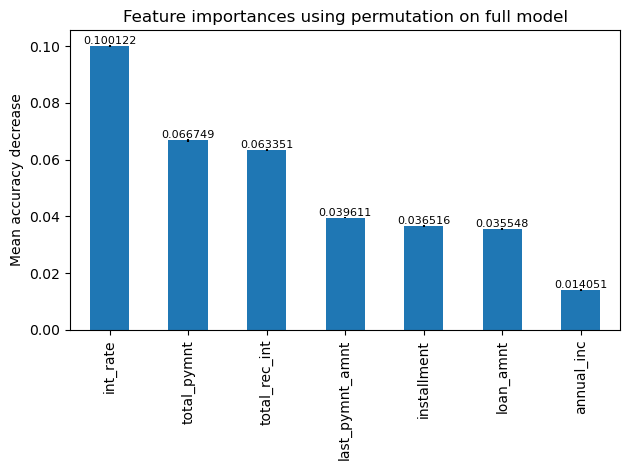

In [26]:
forest_importances = pd.Series(results.importances_mean, index=X.columns)
fig, ax = plt.subplots()
forest_importances.sort_values(ascending=False).plot.bar(yerr=results.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()

# Add label values to the bars
for i, v in enumerate(forest_importances.sort_values(ascending=False).values):
    ax.text(i, v, f"{v:.6f}", ha="center", va="bottom", fontsize=8)

plt.show()

Can you comment on the results?